In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix


In [145]:
orig_df = pd.read_csv('top_1000_popular_movies_tmdb.csv', lineterminator='\n')

orig_df.head()

,Unnamed: 0,id,title,release_date,genres,original_language,vote_average,vote_count,popularity,overview,budget,production_companies,revenue,runtime,tagline
0,0,385687,Fast X,2023-05-17,"['Action', 'Crime', 'Thriller']",English,7.4,1347,8363.473,Over many missions and against impossible odds...,340000000,"['Universal Pictures', 'Original Film', 'One R...",652000000,142,The end of the road begins.
1,1,603692,John Wick: Chapter 4,2023-03-22,"['Action', 'Thriller', 'Crime']",English,7.9,2896,4210.313,"With the price on his head ever increasing, Jo...",90000000,"['Thunder Road', '87Eleven', 'Summit Entertain...",431769198,170,"No way back, one way out."
2,2,502356,The Super Mario Bros. Movie,2023-04-05,"['Animation', 'Family', 'Adventure', 'Fantasy'...",English,7.8,4628,3394.458,"While working underground to fix a water main,...",100000000,"['Universal Pictures', 'Illumination', 'Ninten...",1308766975,92,NaN
3,3,569094,Spider-Man: Across the Spider-Verse,2023-05-31,"['Action', 'Adventure', 'Animation', 'Science ...",English,8.8,1160,2859.047,"After reuniting with Gwen Stacy, Brooklyn’s fu...",100000000,"['Columbia Pictures', 'Sony Pictures Animation...",313522201,140,It's how you wear the mask that matters
4,4,536437,Hypnotic,2023-05-11,"['Mystery', 'Thriller', 'Science Fiction']",English,6.5,154,2654.854,A detective becomes entangled in a mystery inv...,70000000,"['Studio 8', 'Solstice Productions', 'Ingeniou...",0,94,Control is an illusion.


In [146]:
orig_df.shape

(10000, 15)

In [147]:
orig_df.columns

Index(['Unnamed: 0', 'id', 'title', 'release_date', 'genres',
       'original_language', 'vote_average', 'vote_count', 'popularity',
       'overview', 'budget', 'production_companies', 'revenue', 'runtime',
       'tagline'],
      dtype='object')

In [148]:
orig_df.dtypes

Unnamed: 0                int64
id                        int64
title                    object
release_date             object
genres                   object
original_language        object
vote_average            float64
vote_count                int64
popularity              float64
overview                 object
budget                    int64
production_companies     object
revenue                   int64
runtime                   int64
tagline                  object
dtype: object

Handling missing data

In [149]:
null_percent = orig_df.isnull().sum() / len(orig_df) * 100
null_percent

Unnamed: 0               0.00
id                       0.00
title                    0.00
release_date             0.23
genres                   0.00
original_language        0.00
vote_average             0.00
vote_count               0.00
popularity               0.00
overview                 0.76
budget                   0.00
production_companies     0.00
revenue                  0.00
runtime                  0.00
tagline                 26.17
dtype: float64

<Axes: >

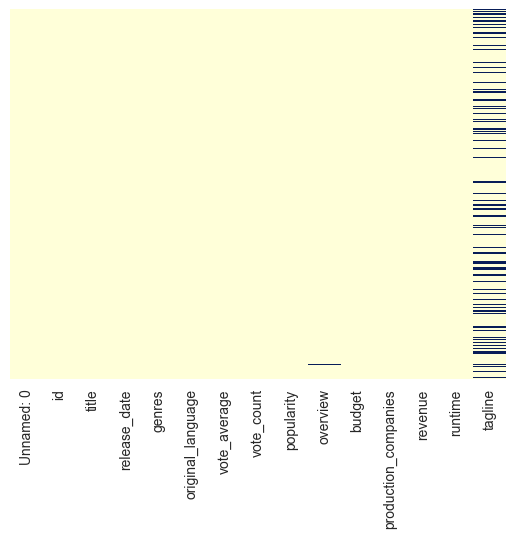

In [150]:
sns.heatmap(orig_df.isnull(), yticklabels=False, cbar=False, cmap='YlGnBu')

In [151]:
df = orig_df.copy()
df.dtypes

Unnamed: 0                int64
id                        int64
title                    object
release_date             object
genres                   object
original_language        object
vote_average            float64
vote_count                int64
popularity              float64
overview                 object
budget                    int64
production_companies     object
revenue                   int64
runtime                   int64
tagline                  object
dtype: object

<Axes: >

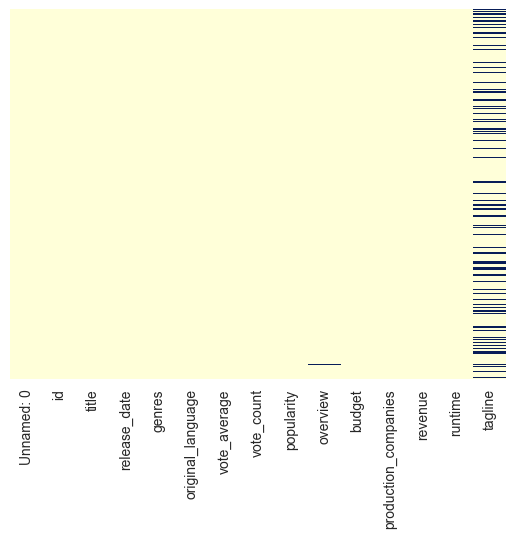

In [152]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='YlGnBu')

In [153]:
df['overview'] = df['overview'].fillna('N/A')
df['tagline'] = df['tagline'].fillna('N/A')
df[df['genres'].str.len() == 2]


,Unnamed: 0,id,title,release_date,genres,original_language,vote_average,vote_count,popularity,overview,budget,production_companies,revenue,runtime,tagline
649,649,968580,Gabriel's Inferno: Part IV,2022-03-30,[],English,5.0,2,64.957,N/A,0,[],0,0,N/A
1072,1072,626412,Alienoid: Part 2,NaN,[],Korean,0.0,0,47.439,N/A,0,['Caper Film'],0,0,N/A
1481,1481,449302,Snake Beauty,1994-03-26,[],Chinese,0.0,0,38.307,Some female ghosts seduce and kill trespassers...,0,['Ka Shing Film Production Co.'],0,88,N/A
2094,2094,466353,Oppressive Torture,1978-01-14,[],Japanese,4.7,3,31.184,"In the end of the 19th century, social restora...",0,['Wakamatsu Production'],0,61,N/A
2185,2185,957174,Za gyakutai: Nyotai ikedori-hen,1987-07-18,[],Japanese,6.5,1,30.352,N/A,0,['Orient 21'],0,64,N/A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8614,8614,741600,One More Chance,2023-06-21,[],cn,0.0,0,13.465,"Fai, a compulsive gambler and an irresponsible...",0,[],0,0,N/A
8991,8991,1136228,Freedom Is Beautiful,2023-06-11,[],English,0.0,0,13.122,Farhad Bandesh and Mostafa Azimitibar were fin...,0,[],0,67,"Two remarkable Kurdish Iranian asylum seekers,..."
9308,9308,971361,Koichiro Uno's Caressing the Peach,1985-04-06,[],Japanese,7.0,1,12.858,Nikkatsu Roman Porno,0,['Nikkatsu Corporation'],0,62,N/A
9684,9684,917269,The Witcher Season One Recap: From the Beginning,2021-12-17,[],English,5.7,9,12.548,From Yennefer's magical origins to Geralt's fi...,0,[],0,15,N/A


<Axes: >

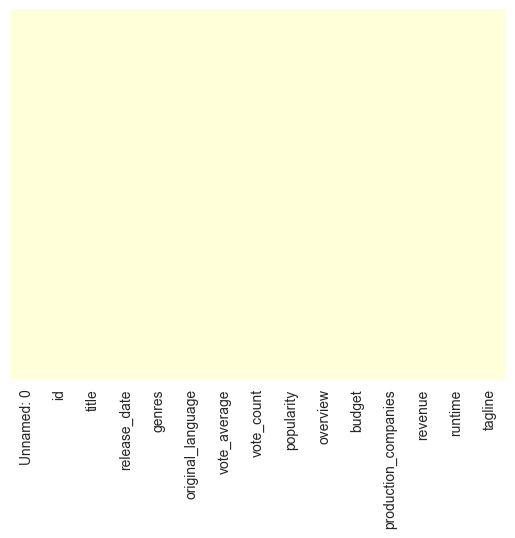

In [154]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='YlGnBu')

Distribution and Ranges of Values

In [155]:
# Separate the genres
df['genres'] = df['genres'].apply(lambda x: eval(x))

df_separated_genres = df.explode('genres')
df_separated_genres.reset_index(drop=True, inplace=True)
df_separated_genres

,Unnamed: 0,id,title,release_date,genres,original_language,vote_average,vote_count,popularity,overview,budget,production_companies,revenue,runtime,tagline
0,0,385687,Fast X,2023-05-17,Action,English,7.4,1347,8363.473,Over many missions and against impossible odds...,340000000,"['Universal Pictures', 'Original Film', 'One R...",652000000,142,The end of the road begins.
1,0,385687,Fast X,2023-05-17,Crime,English,7.4,1347,8363.473,Over many missions and against impossible odds...,340000000,"['Universal Pictures', 'Original Film', 'One R...",652000000,142,The end of the road begins.
2,0,385687,Fast X,2023-05-17,Thriller,English,7.4,1347,8363.473,Over many missions and against impossible odds...,340000000,"['Universal Pictures', 'Original Film', 'One R...",652000000,142,The end of the road begins.
3,1,603692,John Wick: Chapter 4,2023-03-22,Action,English,7.9,2896,4210.313,"With the price on his head ever increasing, Jo...",90000000,"['Thunder Road', '87Eleven', 'Summit Entertain...",431769198,170,"No way back, one way out."
4,1,603692,John Wick: Chapter 4,2023-03-22,Thriller,English,7.9,2896,4210.313,"With the price on his head ever increasing, Jo...",90000000,"['Thunder Road', '87Eleven', 'Summit Entertain...",431769198,170,"No way back, one way out."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25967,9997,28774,Communion,1989-11-10,Science Fiction,English,5.3,147,12.300,A novelist's wife and son see him changed by a...,5000000,"['The Picture Property Company', 'Allied Visio...",1919653,103,The true story of one man's terrifying journey...
25968,9997,28774,Communion,1989-11-10,Thriller,English,5.3,147,12.300,A novelist's wife and son see him changed by a...,5000000,"['The Picture Property Company', 'Allied Visio...",1919653,103,The true story of one man's terrifying journey...
25969,9998,11121,Tess,1979-10-06,Drama,English,7.0,283,12.300,A strong-willed peasant girl is sent by her fa...,12000000,"['Renn Productions', 'Timothy Burrill Producti...",20101247,186,She was born into a world where they called it...
25970,9998,11121,Tess,1979-10-06,Romance,English,7.0,283,12.300,A strong-willed peasant girl is sent by her fa...,12000000,"['Renn Productions', 'Timothy Burrill Producti...",20101247,186,She was born into a world where they called it...


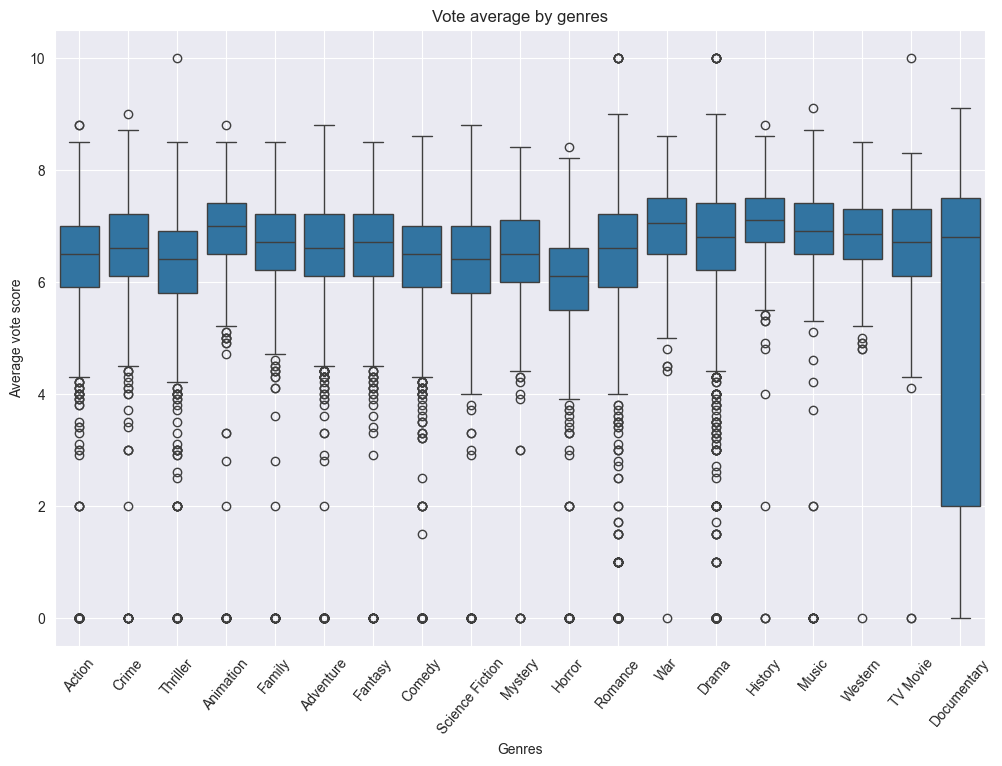

In [156]:
# Vote average by genres



plt.figure(figsize=(12,8))
sns.boxplot(x='genres', y='vote_average', data=df_separated_genres)

plt.title('Vote average by genres')
plt.xlabel('Genres')
plt.ylabel('Average vote score')
plt.grid('True')
plt.xticks(rotation=50)
plt.show()


In [189]:
df['genres']

0                             [Action, Crime, Thriller]
1                             [Action, Thriller, Crime]
2       [Animation, Family, Adventure, Fantasy, Comedy]
3       [Action, Adventure, Animation, Science Fiction]
4                  [Mystery, Thriller, Science Fiction]
                             ...                       
9995                                   [Romance, Drama]
9996                                  [Comedy, Mystery]
9997         [Drama, Horror, Science Fiction, Thriller]
9998                                   [Drama, Romance]
9999                                           [Horror]
Name: genres, Length: 10000, dtype: object

Adding profit column in DataFrame

In [158]:
df['profit'] = df['revenue'] - df['budget']
df_separated_genres['profit'] = df_separated_genres['revenue'] - df['budget']

In [159]:
df.to_csv('movies.csv', index=False)

In [160]:
max_budget = df.sort_values('budget', ascending=False).head(10)
#max_budget
max_revenue = df.sort_values('revenue', ascending=False).head(10)
#max_revenue
max_profit = df.sort_values('profit', ascending=False).head(10)
#max_profit
max_loss = df.sort_values('profit', ascending=True).head(10)
max_loss['loss'] = -max_loss['profit']
#max_loss
max_popularity = df.sort_values('popularity', ascending=False).head(10)
#max_popularity
max_vc = df.sort_values('vote_count', ascending=False).head(10)
#max_vc
max_va = df.sort_values('vote_average', ascending=False).head(10)
# max_va

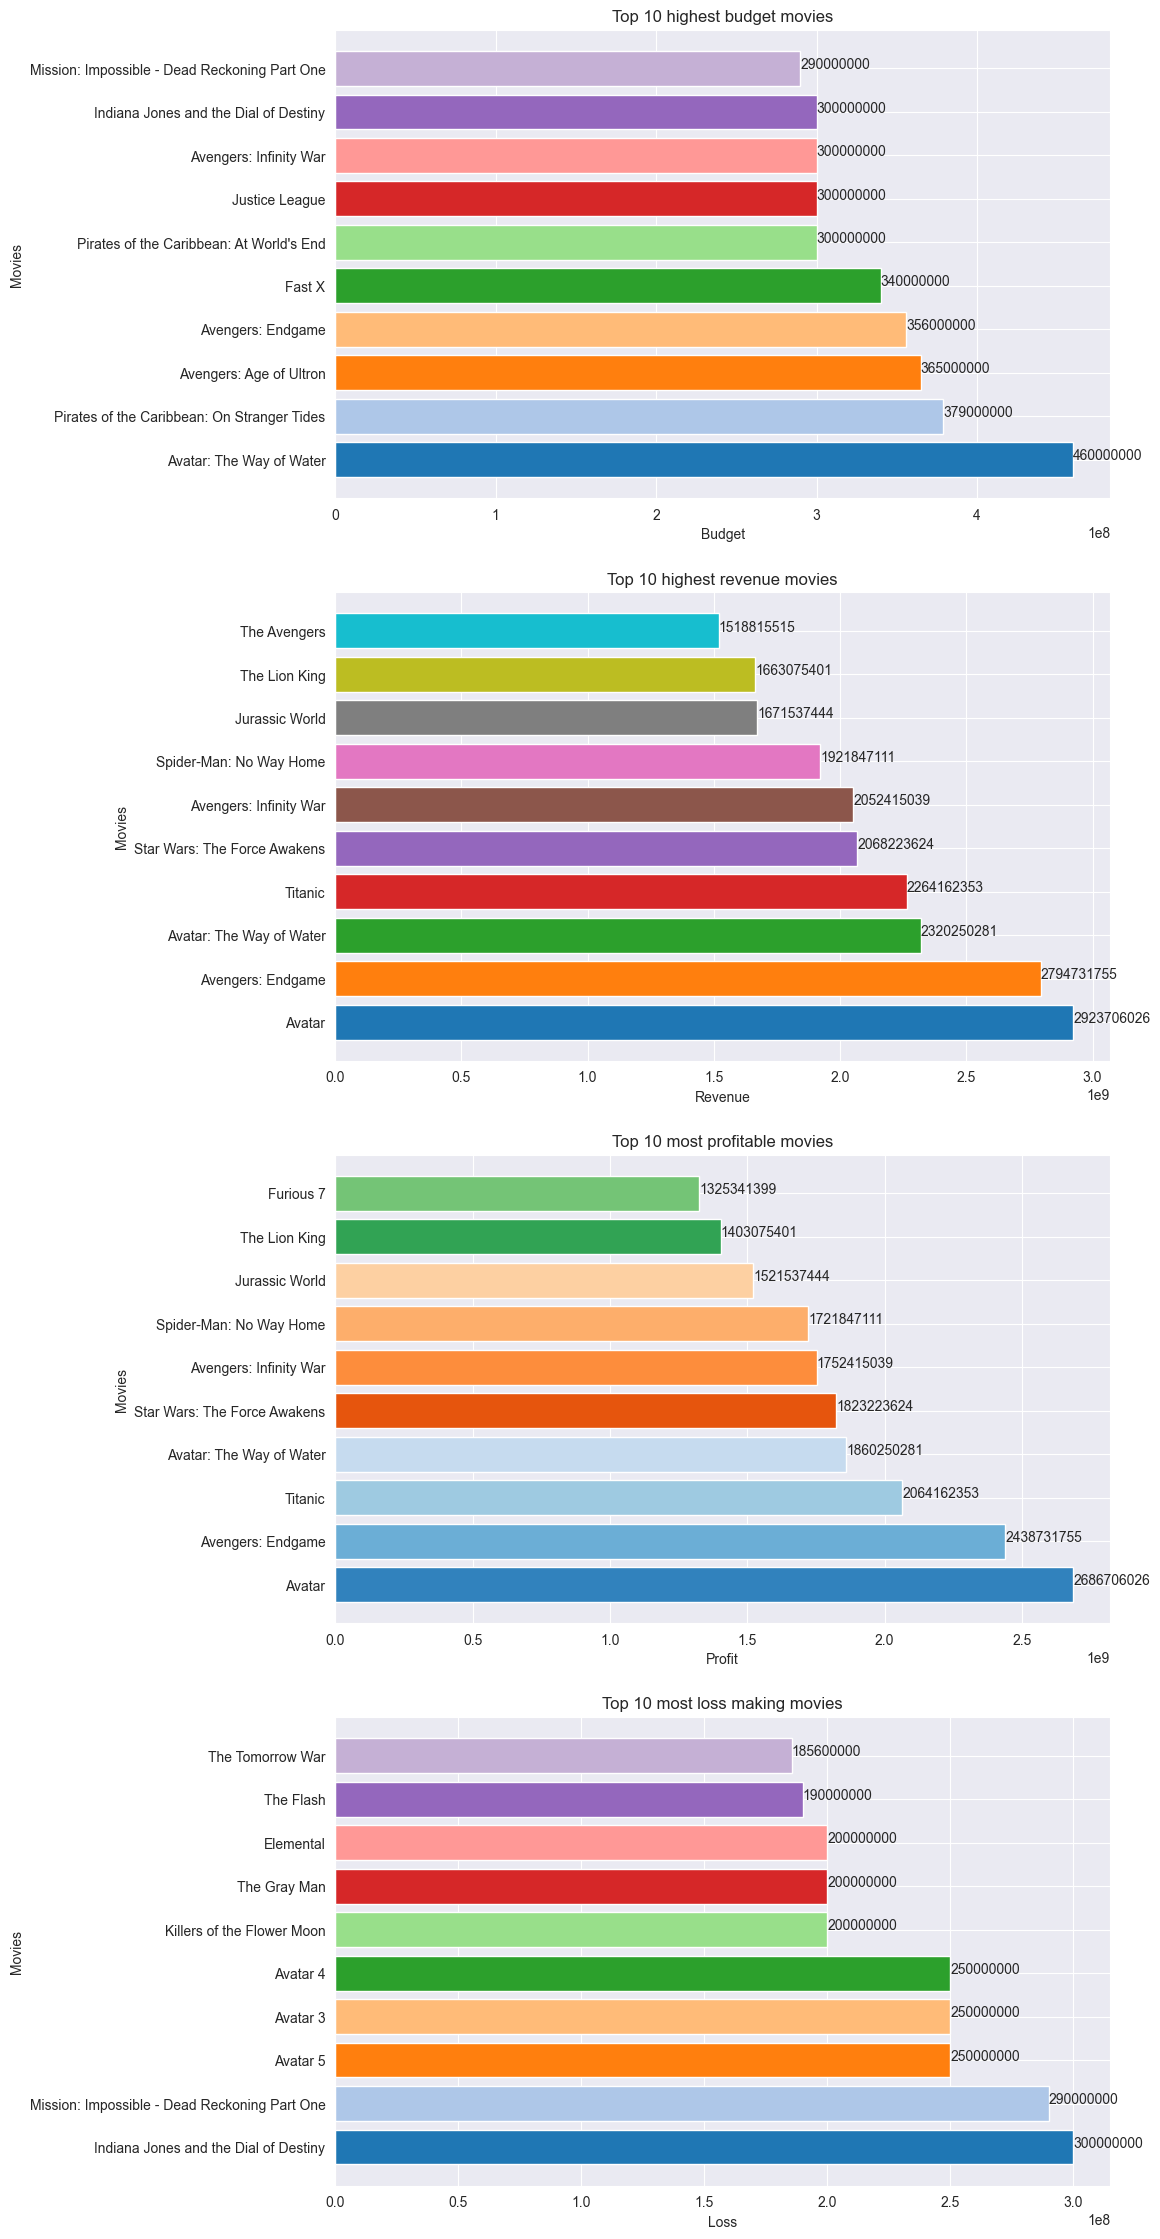

In [161]:
fig, axs = plt.subplots(4,1,figsize=(10,28))

col_map = plt.get_cmap('tab20')
axs[0].barh(max_budget['title'], max_budget['budget'], color=col_map.colors)
axs[0].set_title('Top 10 highest budget movies')
axs[0].set_xlabel('Budget')
axs[0].set_ylabel('Movies')
for i in range(len(max_budget)):
    axs[0].text(max_budget['budget'].iloc[i], max_budget['title'].iloc[i], max_budget['budget'].iloc[i])

col_map = plt.get_cmap('tab10')
axs[1].barh(max_revenue['title'], max_revenue['revenue'], color=col_map.colors)
axs[1].set_title('Top 10 highest revenue movies')
axs[1].set_xlabel('Revenue')
axs[1].set_ylabel('Movies')
for i in range(len(max_revenue)):
    axs[1].text(max_revenue['revenue'].iloc[i], max_revenue['title'].iloc[i], max_revenue['revenue'].iloc[i])

col_map = plt.get_cmap('tab20c')
axs[2].barh(max_profit['title'], max_profit['profit'], color=col_map.colors)
axs[2].set_title('Top 10 most profitable movies')
axs[2].set_xlabel('Profit')
axs[2].set_ylabel('Movies')
for i in range(len(max_profit)):
    axs[2].text(max_profit['profit'].iloc[i], max_profit['title'].iloc[i], max_profit['profit'].iloc[i])
    
col_map = plt.get_cmap('tab20')
axs[3].barh(max_loss['title'], max_loss['loss'], color=col_map.colors)
axs[3].set_title('Top 10 most loss making movies')
axs[3].set_xlabel('Loss')
axs[3].set_ylabel('Movies')
for i in range(len(max_loss)):
    axs[3].text(max_loss['loss'].iloc[i], max_loss['title'].iloc[i], max_loss['loss'].iloc[i])

plt.show()

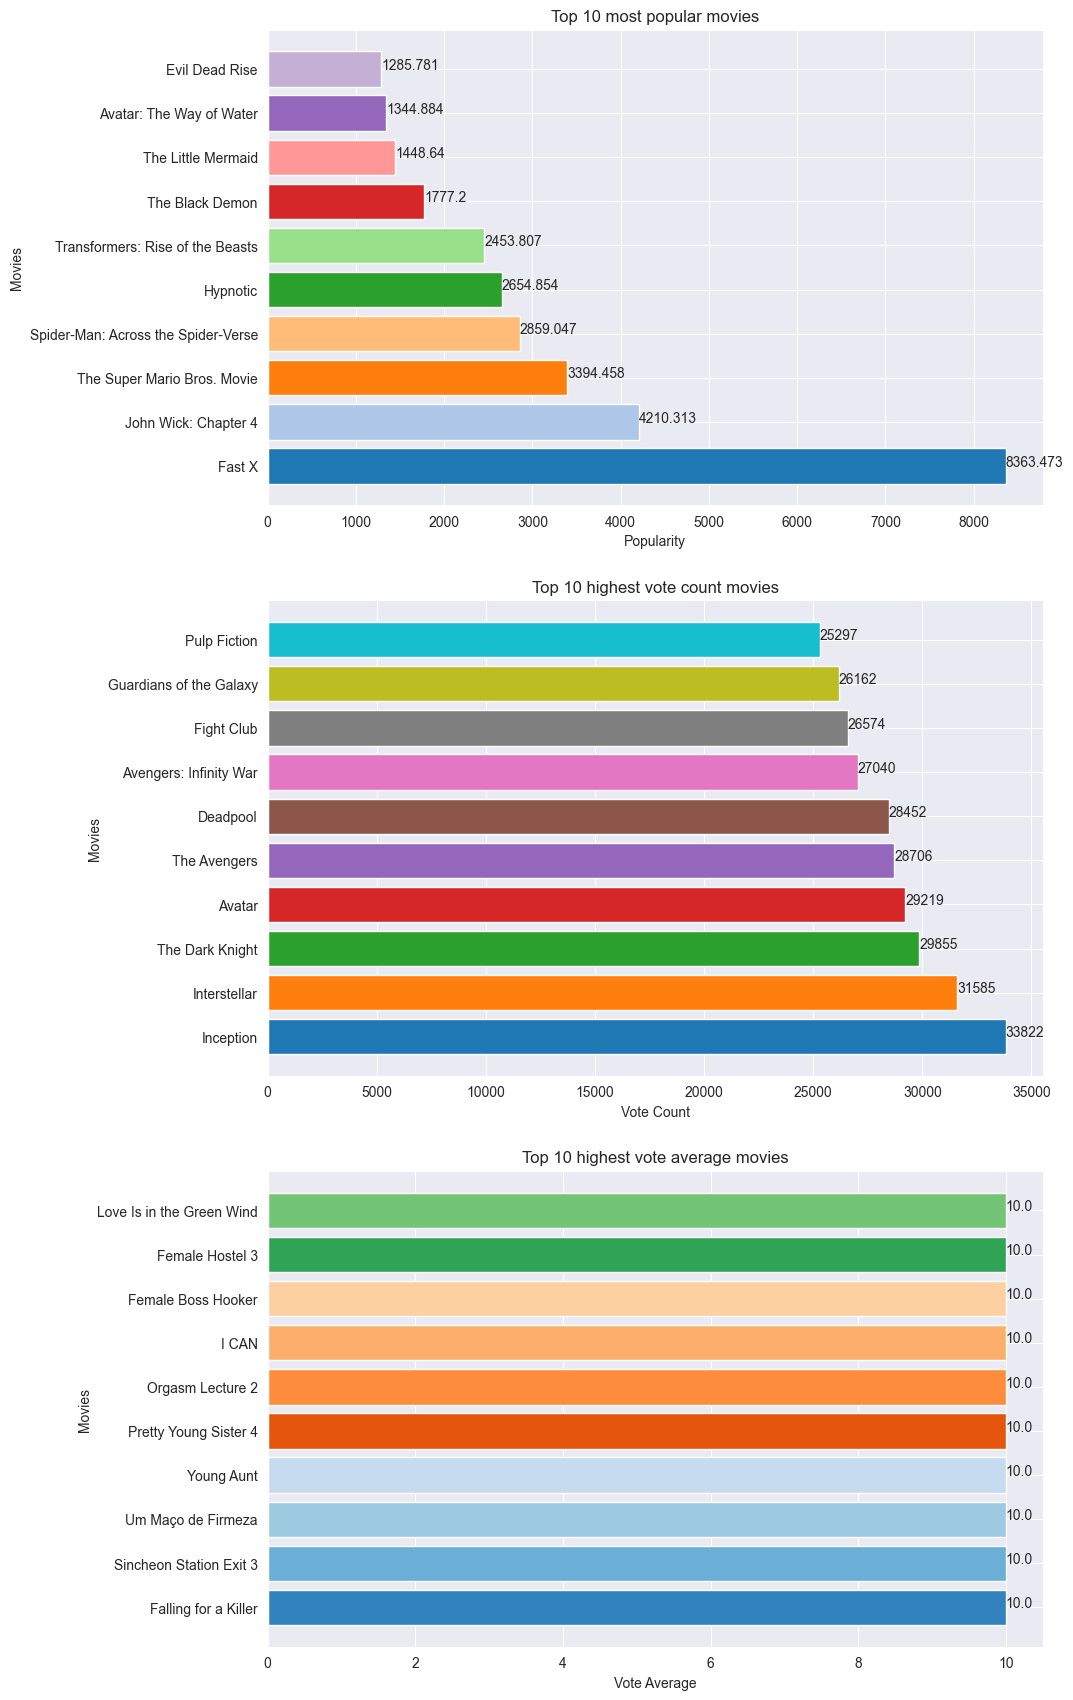

In [162]:
fig, axs = plt.subplots(3,1,figsize=(10,21))

col_map = plt.get_cmap('tab20')
axs[0].barh(max_popularity['title'], max_popularity['popularity'], color=col_map.colors)
axs[0].set_title('Top 10 most popular movies')
axs[0].set_xlabel('Popularity')
axs[0].set_ylabel('Movies')
for i in range(len(max_popularity)):
    axs[0].text(max_popularity['popularity'].iloc[i], max_popularity['title'].iloc[i], max_popularity['popularity'].iloc[i])

col_map = plt.get_cmap('tab10')
axs[1].barh(max_vc['title'], max_vc['vote_count'], color=col_map.colors)
axs[1].set_title('Top 10 highest vote count movies')
axs[1].set_xlabel('Vote Count')
axs[1].set_ylabel('Movies')
for i in range(len(max_vc)):
    axs[1].text(max_vc['vote_count'].iloc[i], max_vc['title'].iloc[i], max_vc['vote_count'].iloc[i])

col_map = plt.get_cmap('tab20c')
axs[2].barh(max_va['title'], max_va['vote_average'], color=col_map.colors)
axs[2].set_title('Top 10 highest vote average movies')
axs[2].set_xlabel('Vote Average')
axs[2].set_ylabel('Movies')
for i in range(len(max_va)):
    axs[2].text(max_va['vote_average'].iloc[i], max_va['title'].iloc[i], max_va['vote_average'].iloc[i])

plt.show()


Movies by their language

In [163]:
df['original_language'].value_counts()

original_language
English             7304
Japanese             663
Korean               397
French               334
Spanish              298
cn                   155
Chinese              154
Italian              151
German                88
Russian               71
Portuguese            49
Tagalog               48
Hindi                 33
Norwegian             29
Swedish               27
Danish                26
Dutch                 23
Thai                  22
Polish                21
Turkish               20
Indonesian            11
Finnish                8
Tamil                  7
Telugu                 7
Arabic                 6
Greek                  6
Ukrainian              4
Vietnamese             3
Basque                 3
Czech                  3
Persian                3
Romanian               3
Galician               2
Icelandic              2
Serbian                2
Khmer                  1
Hebrew                 1
Hungarian              1
Haitian                1
Norwegi

In [164]:
df['genres']

0                             [Action, Crime, Thriller]
1                             [Action, Thriller, Crime]
2       [Animation, Family, Adventure, Fantasy, Comedy]
3       [Action, Adventure, Animation, Science Fiction]
4                  [Mystery, Thriller, Science Fiction]
                             ...                       
9995                                   [Romance, Drama]
9996                                  [Comedy, Mystery]
9997         [Drama, Horror, Science Fiction, Thriller]
9998                                   [Drama, Romance]
9999                                           [Horror]
Name: genres, Length: 10000, dtype: object

In [165]:
genres_col = df['genres']
# Empty set to store unique genres
unique_genres = set()
# Iterate over each row in the genres column
for genres_list in genres_col:
    genres = eval(genres_list)  # Convert the string representation of list to a list
    unique_genres.update(genres)  # Add the genres to the set
    
len(unique_genres)

TypeError: eval() arg 1 must be a string, bytes or code object

In [ ]:
df_separated_genres

In [ ]:
df['genres'].isnull().sum()

In [170]:

df_separated_genres.columns


Index(['Unnamed: 0', 'id', 'title', 'release_date', 'genres',
       'original_language', 'vote_average', 'vote_count', 'popularity',
       'overview', 'budget', 'production_companies', 'revenue', 'runtime',
       'tagline', 'profit'],
      dtype='object')

In [177]:
df_separated_genres['profit'] = df_separated_genres['revenue'] - df_separated_genres['budget']

# Group by genre
genre_groups = df_separated_genres.groupby('genres')

# Find the most profitable movie in each genre
most_profitable_movies = genre_groups.apply(lambda x: x.loc[x['profit'].idxmax()])

# Display the most profitable movies for each genre
print(most_profitable_movies[['genres', 'title', 'profit']])

                          genres                                      title  \
genres                                                                        
Action                    Action                                     Avatar   
Adventure              Adventure                                     Avatar   
Animation              Animation                              The Lion King   
Comedy                    Comedy                                  Frozen II   
Crime                      Crime                                  Furious 7   
Documentary          Documentary                            Fahrenheit 9/11   
Drama                      Drama                                    Titanic   
Family                    Family                              The Lion King   
Fantasy                  Fantasy                                     Avatar   
History                  History                          Bohemian Rhapsody   
Horror                    Horror                    

C:\Users\taroo\AppData\Local\Temp\ipykernel_26488\2072337728.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  most_profitable_movies = genre_groups.apply(lambda x: x.loc[x['profit'].idxmax()])


5 Most profitable movies for every genres

In [185]:

for genre in df_separated_genres['genres'].unique():
    # Filter movies by genre and sort by profit
    movies = df_separated_genres[df_separated_genres['genres'].str.contains(genre, na=False)].sort_values('profit', ascending=False).head(5)
    movie_titles = movies['title'].values
    print(genre)
    for i, title in enumerate(movie_titles):
        print(i + 1, title)
    print("\n")

Action
1 Avatar
2 Avengers: Endgame
3 Avatar: The Way of Water
4 Star Wars: The Force Awakens
5 Avengers: Infinity War


Crime
1 Furious 7
2 Joker
3 The Fate of the Furious
4 The Dark Knight Rises
5 The Dark Knight


Thriller
1 Jurassic World
2 Furious 7
3 Jurassic World: Fallen Kingdom
4 Joker
5 The Fate of the Furious


Animation
1 The Lion King
2 Frozen II
3 The Super Mario Bros. Movie
4 Frozen
5 Minions


Family
1 The Lion King
2 Frozen II
3 The Super Mario Bros. Movie
4 Frozen
5 Beauty and the Beast


Adventure
1 Avatar
2 Avengers: Endgame
3 Avatar: The Way of Water
4 Star Wars: The Force Awakens
5 Avengers: Infinity War


Fantasy
1 Avatar
2 Frozen II
3 Harry Potter and the Deathly Hallows: Part 2
4 The Super Mario Bros. Movie
5 Frozen


Comedy
1 Frozen II
2 The Super Mario Bros. Movie
3 Minions
4 Despicable Me 3
5 Jumanji: Welcome to the Jungle


Science Fiction
1 Avatar
2 Avengers: Endgame
3 Avatar: The Way of Water
4 Star Wars: The Force Awakens
5 Avengers: Infinity War


Myste

TypeError: first argument must be string or compiled pattern

Top 5 most popular movies.

In [186]:
for genre in df_separated_genres['genres'].unique():
    # Filter movies by genre and sort by profit
    movies = df_separated_genres[df_separated_genres['genres'].str.contains(genre, na=False)].sort_values('popularity', ascending=False).head(5)
    movie_titles = movies['title'].values
    print(genre)
    for i, title in enumerate(movie_titles):
        print(i + 1, title)
    print("\n")

Action
1 Fast X
2 John Wick: Chapter 4
3 Spider-Man: Across the Spider-Verse
4 Transformers: Rise of the Beasts
5 Avatar: The Way of Water


Crime
1 Fast X
2 John Wick: Chapter 4
3 Accident Man: Hitman's Holiday
4 To Catch a Killer
5 Extras For Chasing The Dragon


Thriller
1 Fast X
2 John Wick: Chapter 4
3 Hypnotic
4 The Black Demon
5 Evil Dead Rise


Animation
1 The Super Mario Bros. Movie
2 Spider-Man: Across the Spider-Verse
3 Spider-Man: Into the Spider-Verse
4 Puss in Boots: The Last Wish
5 Sword Art Online the Movie -Progressive- Scherzo of Deep Night


Family
1 The Super Mario Bros. Movie
2 The Little Mermaid
3 Crater
4 Puss in Boots: The Last Wish
5 Peter Pan & Wendy


Adventure
1 The Super Mario Bros. Movie
2 Spider-Man: Across the Spider-Verse
3 Transformers: Rise of the Beasts
4 The Little Mermaid
5 Avatar: The Way of Water


Fantasy
1 The Super Mario Bros. Movie
2 The Little Mermaid
3 Shazam! Fury of the Gods
4 Puss in Boots: The Last Wish
5 Sword Art Online the Movie -Pro

TypeError: first argument must be string or compiled pattern

Story telling: Thai Movies

In [190]:
thai_movies = df[df['original_language'] == "Thai"]
thai_movies

,Unnamed: 0,id,title,release_date,genres,original_language,vote_average,vote_count,popularity,overview,budget,production_companies,revenue,runtime,tagline,profit
751,751,1025169,The Trapped 13: How We Survived The Thai Cave,2022-10-05,[Documentary],Thai,6.9,32,59.081,"In this compelling documentary, members of the...",0,[],0,102,N/A,0
1003,1003,1071806,Hunger,2023-04-04,"[Thriller, Drama]",Thai,7.4,241,49.671,A talented young street-food cook pushes herse...,0,['Song Sound Production'],0,145,There is a hunger that can never be fulfilled.,0
1075,1075,1034337,The Lost Lotteries,2022-11-16,"[Crime, Comedy]",Thai,6.6,14,47.295,Five down-on-their-luck strangers must band to...,0,['GMM Studios'],0,106,The loser team up for a lost cause.,0
1832,1832,8982,The Protector,2005-08-11,"[Action, Crime, Drama, Thriller]",Thai,7.1,750,33.686,"In Bangkok, the young Kham was raised by his f...",6000000,"['Sahamongkolfilm', 'Baa-Ram-Ewe', 'Golden Net...",27165581,111,Vengeance Knows No Mercy.,21165581
1932,1932,745881,The Medium,2021-07-14,"[Horror, Thriller]",Thai,7.1,499,32.550,A horrifying story of a shaman’s inheritance i...,0,"['GDH 559', 'Northern Cross', 'Jorkwang Films'...",7230000,131,A story about shamanism in Thailand.,7230000
2015,2015,151512,Jan Dara: The Beginning,2012-09-06,"[Drama, Romance]",Thai,5.7,26,31.882,"Set in the 1930s, the story recounts the growi...",0,['Sahamongkolfilm'],0,137,"A tragedy of lust, love and revenge…",0
2043,2043,68507,Jan Dara,2001-09-28,"[Romance, Drama]",Thai,6.4,31,31.632,Jan is a boy growing up in 1930s Siam in a wea...,0,['Tai Entertainment'],0,113,Asia's erotic phenomenon!,0
2679,2679,977177,Home for Rent,2023-04-06,"[Horror, Drama, Thriller]",Thai,6.4,5,26.874,A man becomes determined to protect his family...,0,"['GDH 559', 'Jor Kwang Films', 'N8 Studio', 'C...",0,124,Shocking mysterious in a rented house!,0
2786,2786,889741,Fast & Feel Love,2022-04-06,"[Comedy, Romance, Action]",Thai,7.2,20,26.244,When a world champion of sport stacking is dum...,0,"['GDH 559', 'Very Sad Pictures', 'Happy Ending...",0,132,An action movie about daily life. Feel the spe...,0
2839,2839,16353,Ong Bak 2,2008-12-04,"[Adventure, Action, Thriller]",Thai,6.4,561,25.964,Moments from death a young man is rescued by a...,8500000,"['Iyara Films', 'Sahamongkolfilm']",8936663,98,Warrior. Conqueror. Legend.,436663


In [191]:
thai_movies.describe()

,Unnamed: 0,id,vote_average,vote_count,popularity,budget,revenue,runtime,profit
count,22.000000,2.200000e+01,22.000000,22.000000,22.000000,2.200000e+01,2.200000e+01,22.000000,2.200000e+01
mean,3715.772727,5.106299e+05,6.331818,313.363636,27.426500,7.983713e+05,5.065363e+06,109.045455,4.266992e+06
std,2555.517932,4.394442e+05,1.540064,395.001332,11.902851,2.169435e+06,1.095460e+07,29.193080,1.004491e+07
min,751.000000,8.982000e+03,0.000000,0.000000,12.472000,0.000000e+00,0.000000e+00,0.000000,-1.250000e+05
25%,2022.000000,4.953350e+04,6.125000,27.250000,22.238000,0.000000e+00,0.000000e+00,98.750000,0.000000e+00
50%,2870.500000,5.832925e+05,6.450000,151.500000,25.784000,0.000000e+00,0.000000e+00,108.500000,0.000000e+00
75%,3676.000000,9.203270e+05,7.100000,479.500000,31.819500,0.000000e+00,3.061938e+06,128.750000,1.864438e+06
max,9777.000000,1.071806e+06,7.900000,1500.000000,59.081000,8.500000e+06,4.235000e+07,145.000000,4.051083e+07


In [199]:
# top 10 most popular thai movies

thai_movies_most_popular = thai_movies.sort_values('vote_count', ascending=False).sort_values('vote_count', ascending=False).sort_values('vote_average', ascending=False).head(10)
thai_movies_most_popular

,Unnamed: 0,id,title,release_date,genres,original_language,vote_average,vote_count,popularity,overview,budget,production_companies,revenue,runtime,tagline,profit
8145,8145,455714,Bad Genius,2017-05-03,"[Drama, Crime, Thriller, Comedy]",Thai,7.9,703,13.939,"Lynn, a brilliant student, after helping her f...",1839169,"['GDH 559', 'Jor Kwang Films']",42350000,130,Genius students with one mission... Turning ex...,40510831
1003,1003,1071806,Hunger,2023-04-04,"[Thriller, Drama]",Thai,7.4,241,49.671,A talented young street-food cook pushes herse...,0,['Song Sound Production'],0,145,There is a hunger that can never be fulfilled.,0
9777,9777,15003,Chocolate,2008-02-06,"[Action, Crime]",Thai,7.3,421,12.472,"Zen, an autistic teenage girl with powerful ma...",0,"['Bam-Ram-Ewe', 'Sahamongkolfilm']",0,93,She's sweet but deadly.,0
2786,2786,889741,Fast & Feel Love,2022-04-06,"[Comedy, Romance, Action]",Thai,7.2,20,26.244,When a world champion of sport stacking is dum...,0,"['GDH 559', 'Very Sad Pictures', 'Happy Ending...",0,132,An action movie about daily life. Feel the spe...,0
2865,2865,17111,Shutter,2004-09-09,"[Horror, Mystery, Thriller]",Thai,7.2,1036,25.819,A young photographer Thun and his girlfriend J...,125000,"['GMM Pictures Co.', 'GMM Tai Hub (GTH)', 'MGM...",0,97,The most terrifying images are the ones that a...,-125000
2876,2876,9316,Ong Bak: Muay Thai Warrior,2003-01-21,"[Action, Thriller, Crime, Adventure]",Thai,7.1,1500,25.749,When the head of a statue sacred to a village ...,1100000,"['Baa-Ram-Ewe', 'Sahamongkolfilm', 'EuropaCorp...",20112926,105,No computer graphics. No stunt doubles. No wires.,19012926
1832,1832,8982,The Protector,2005-08-11,"[Action, Crime, Drama, Thriller]",Thai,7.1,750,33.686,"In Bangkok, the young Kham was raised by his f...",6000000,"['Sahamongkolfilm', 'Baa-Ram-Ewe', 'Golden Net...",27165581,111,Vengeance Knows No Mercy.,21165581
1932,1932,745881,The Medium,2021-07-14,"[Horror, Thriller]",Thai,7.1,499,32.550,A horrifying story of a shaman’s inheritance i...,0,"['GDH 559', 'Northern Cross', 'Jorkwang Films'...",7230000,131,A story about shamanism in Thailand.,7230000
751,751,1025169,The Trapped 13: How We Survived The Thai Cave,2022-10-05,[Documentary],Thai,6.9,32,59.081,"In this compelling documentary, members of the...",0,[],0,102,N/A,0
1075,1075,1034337,The Lost Lotteries,2022-11-16,"[Crime, Comedy]",Thai,6.6,14,47.295,Five down-on-their-luck strangers must band to...,0,['GMM Studios'],0,106,The loser team up for a lost cause.,0


In [202]:
# top 5 most profitable thai movies

thai_movies_most_profitable = thai_movies.sort_values('profit', ascending=False)
thai_movies_most_profitable

,Unnamed: 0,id,title,release_date,genres,original_language,vote_average,vote_count,popularity,overview,budget,production_companies,revenue,runtime,tagline,profit
8145,8145,455714,Bad Genius,2017-05-03,"[Drama, Crime, Thriller, Comedy]",Thai,7.9,703,13.939,"Lynn, a brilliant student, after helping her f...",1839169,"['GDH 559', 'Jor Kwang Films']",42350000,130,Genius students with one mission... Turning ex...,40510831
1832,1832,8982,The Protector,2005-08-11,"[Action, Crime, Drama, Thriller]",Thai,7.1,750,33.686,"In Bangkok, the young Kham was raised by his f...",6000000,"['Sahamongkolfilm', 'Baa-Ram-Ewe', 'Golden Net...",27165581,111,Vengeance Knows No Mercy.,21165581
2876,2876,9316,Ong Bak: Muay Thai Warrior,2003-01-21,"[Action, Thriller, Crime, Adventure]",Thai,7.1,1500,25.749,When the head of a statue sacred to a village ...,1100000,"['Baa-Ram-Ewe', 'Sahamongkolfilm', 'EuropaCorp...",20112926,105,No computer graphics. No stunt doubles. No wires.,19012926
1932,1932,745881,The Medium,2021-07-14,"[Horror, Thriller]",Thai,7.1,499,32.550,A horrifying story of a shaman’s inheritance i...,0,"['GDH 559', 'Northern Cross', 'Jorkwang Films'...",7230000,131,A story about shamanism in Thailand.,7230000
3595,3595,110552,The Protector 2,2013-10-23,[Action],Thai,6.0,229,22.514,Kham is the last in long line of guards who on...,0,"['Sahamongkolfilm', 'Baa-Ram-Ewe']",3302463,104,This time the fight goes beyond.,3302463
7540,7540,43209,Ong Bak 3,2010-05-05,"[Action, Adventure, History]",Thai,5.9,379,14.554,Ong Bak 3 picks up where Ong Bak 2 had left of...,0,"['Lyara Films', 'Sahamongkolfilm']",2340363,95,The biggest fight of all is with himself.,2340363
2839,2839,16353,Ong Bak 2,2008-12-04,"[Adventure, Action, Thriller]",Thai,6.4,561,25.964,Moments from death a young man is rescued by a...,8500000,"['Iyara Films', 'Sahamongkolfilm']",8936663,98,Warrior. Conqueror. Legend.,436663
3505,3505,189715,Jan Dara: The Finale,2013-02-07,"[Drama, Romance]",Thai,5.5,17,22.887,Jan Dara returns to Bangkok to take revenge ag...,0,['Sahamongkolfilm'],0,138,The finale to Thailand's most controversial st...,0
8275,8275,710871,Ghost Lab,2021-05-26,"[Drama, Horror, Science Fiction, Thriller]",Thai,6.4,110,13.802,"After witnessing a haunting in their hospital,...",0,"['GDH 559', 'Jor Kwang Films']",0,117,A shocking experiment crossing the line of the...,0
5968,5968,928769,AI Love You,2022-02-15,"[Comedy, Romance, Science Fiction]",Thai,6.1,44,16.736,A modern love story set in the near future whe...,0,"['Deyi Production', 'Blue River Films']",0,95,N/A,0


In [210]:
df['original_language'].value_counts()

original_language
English             7304
Japanese             663
Korean               397
French               334
Spanish              298
cn                   155
Chinese              154
Italian              151
German                88
Russian               71
Portuguese            49
Tagalog               48
Hindi                 33
Norwegian             29
Swedish               27
Danish                26
Dutch                 23
Thai                  22
Polish                21
Turkish               20
Indonesian            11
Finnish                8
Tamil                  7
Telugu                 7
Arabic                 6
Greek                  6
Ukrainian              4
Vietnamese             3
Basque                 3
Czech                  3
Persian                3
Romanian               3
Galician               2
Icelandic              2
Serbian                2
Khmer                  1
Hebrew                 1
Hungarian              1
Haitian                1
Norwegi